In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import layers, models

import numpy as np
import pickle

In [2]:
(train_data, train_labels), (test_data, test_labels) = pickle.load( open( "imdb.p", "rb" ) )
print("train data shape: ", train_data.shape)
print("train labels shape: ", train_labels.shape)

train data shape:  (25000,)
train labels shape:  (25000,)


In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(y, x) for x,y in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [4]:
def vectorize_sequences(sequences, maxlen = 10000):
    out = np.zeros((len(sequences), maxlen))
    for n, i in enumerate(sequences):
        out[n, i] = 1.
    return out


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train[0])

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

[0. 1. 1. ... 0. 0. 0.]


In [7]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop', metrics = ['acc'], loss = 'binary_crossentropy')
history = model.fit(x_train, y_train, epochs=20, batch_size = 512, verbose = 0, validation_split = 0.2)#, validation_split = 0.2)

In [8]:
history.history.keys()

dict_keys(['loss', 'val_loss', 'val_acc', 'acc'])

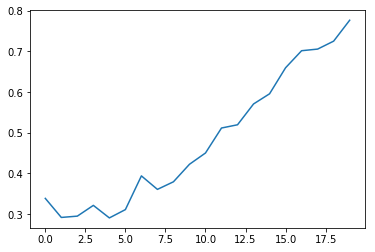

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(20), history.history['val_loss'])

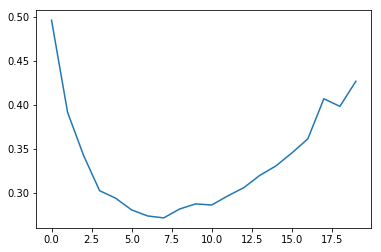

In [10]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop', metrics = ['acc'], loss = 'binary_crossentropy')
history = model.fit(x_train, y_train, epochs=20, batch_size = 512, verbose = 0, validation_split = 0.2)#, validation_split = 0.2)

plt.plot(range(20), history.history['val_loss'])
plt.show()

In [11]:
from tensorflow.keras import regularizers

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 1s 62us/sample - loss: 0.5230 - acc: 0.8034 - val_loss: 0.4057 - val_acc: 0.8674
Epoch 2/20
20000/20000 [==============================] - 1s 53us/sample - loss: 0.3348 - acc: 0.9037 - val_loss: 0.3368 - val_acc: 0.8876
Epoch 3/20
20000/20000 [==============================] - 1s 51us/sample - loss: 0.2808 - acc: 0.9187 - val_loss: 0.3249 - val_acc: 0.8906
Epoch 4/20
20000/20000 [==============================] - 1s 52us/sample - loss: 0.2531 - acc: 0.9287 - val_loss: 0.3707 - val_acc: 0.8716
Epoch 5/20
20000/20000 [==============================] - 1s 52us/sample - loss: 0.2422 - acc: 0.9342 - val_loss: 0.3472 - val_acc: 0.8808
Epoch 6/20
20000/20000 [==============================] - 1s 52us/sample - loss: 0.2260 - acc: 0.9397 - val_loss: 0.3777 - val_acc: 0.8696
Epoch 7/20
20000/20000 [==============================] - 1s 53us/sample - loss: 0.2166 - acc: 0.9451 - val_loss: 0.3

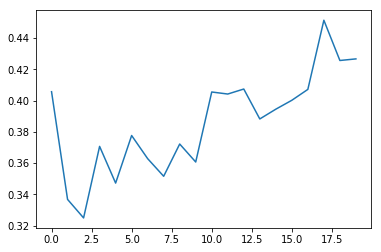

In [14]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,), kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop', metrics = ['acc'], loss = 'binary_crossentropy')
history = model.fit(x_train, y_train, epochs=20, batch_size = 512, verbose = 1, validation_split = 0.2)#, validation_split = 0.2)

plt.plot(range(20), history.history['val_loss'])
plt.show()

In [15]:
import numpy as np

In [16]:
np.random.randint(0, high=2, size = (10, 5))

array([[1, 1, 0, 0, 0],
       [0, 1, 0, 1, 0],
       [0, 1, 1, 0, 1],
       [1, 0, 1, 1, 0],
       [0, 1, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 1, 0],
       [0, 1, 1, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 1, 1, 1, 0]])

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 2s 79us/sample - loss: 0.6305 - acc: 0.6342 - val_loss: 0.5020 - val_acc: 0.8568
Epoch 2/20
20000/20000 [==============================] - 1s 68us/sample - loss: 0.5001 - acc: 0.7700 - val_loss: 0.3782 - val_acc: 0.8756
Epoch 3/20
20000/20000 [==============================] - 1s 68us/sample - loss: 0.4065 - acc: 0.8289 - val_loss: 0.3255 - val_acc: 0.8822
Epoch 4/20
20000/20000 [==============================] - 1s 69us/sample - loss: 0.3415 - acc: 0.8686 - val_loss: 0.2830 - val_acc: 0.8932
Epoch 5/20
20000/20000 [==============================] - 1s 50us/sample - loss: 0.2931 - acc: 0.8977 - val_loss: 0.2764 - val_acc: 0.8942
Epoch 6/20
20000/20000 [==============================] - 1s 52us/sample - loss: 0.2556 - acc: 0.9119 - val_loss: 0.2738 - val_acc: 0.8960
Epoch 7/20
20000/20000 [==============================] - 1s 50us/sample - loss: 0.2310 - acc: 0.9229 - val_loss: 0.2

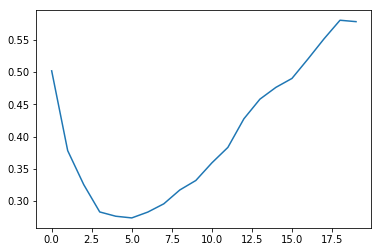

In [17]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop', metrics = ['acc'], loss = 'binary_crossentropy')
history = model.fit(x_train, y_train, epochs=20, batch_size = 512, verbose = 1, validation_split = 0.2)#, validation_split = 0.2)

plt.plot(range(20), history.history['val_loss'])
plt.show()